In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns



In [2]:
penguins = pd.read_csv("./Data/penguins.csv")
penguins = penguins.dropna()
penguins

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [3]:
X = penguins[["culmen_length_mm", "culmen_depth_mm",
             "flipper_length_mm",
             "body_mass_g",
            ]]
y = penguins["species"]

In [4]:
y.value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

<p></p>
<br />
<div id="p1" style="direction:rtl;line-height:150%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
           5.1. رسم نمودار نقاط بر حسب هر جفت ویژگی‌ها
        </font>
		<p></p>
		<hr>
        در این بخش نمودار scatter هر جفت ویژگی نسبت به هم رسم می‌شود. تعداد این نمودار ها 6 تاست که در ادامه رسم شده اند.
  	</font>
</div> 

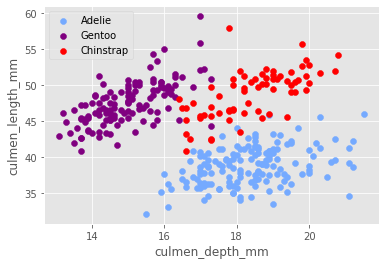

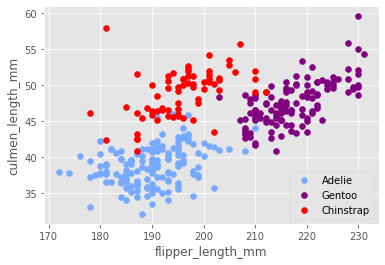

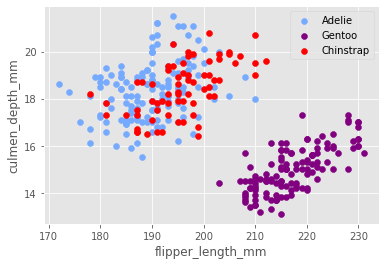

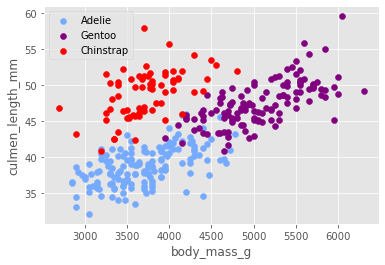

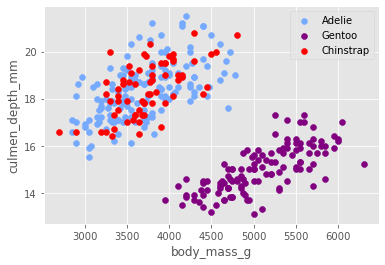

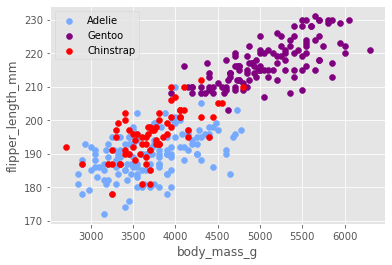

In [5]:
plt.style.use('ggplot') 
for i in range(X.shape[1]):  
    for j in range(X.shape[1]):
        if (i>j):
            plt.scatter(penguins[penguins["species"] == "Adelie"][X.columns[i]],penguins[penguins["species"] == "Adelie"][X.columns[j]],c="#75AAFF", label='Adelie')
            plt.scatter(penguins[penguins["species"] == "Gentoo"][X.columns[i]],penguins[penguins["species"] == "Gentoo"][X.columns[j]], c='purple', label='Gentoo')
            plt.scatter(penguins[penguins["species"] == "Chinstrap"][X.columns[i]],penguins[penguins["species"] == "Chinstrap"][X.columns[j]], c='red', label='Chinstrap')
            
            
            plt.xlabel(X.columns[i])
            plt.ylabel(X.columns[j])
            plt.legend()
            plt.show()

<p></p>
<br />
<div id="p1" style="direction:rtl;line-height:150%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
           5.1. رسم هیستوگرام ها
        </font>
		<p></p>
		<hr>
  	</font>
</div> 

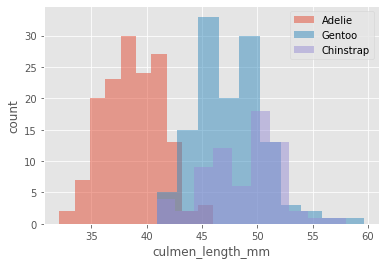

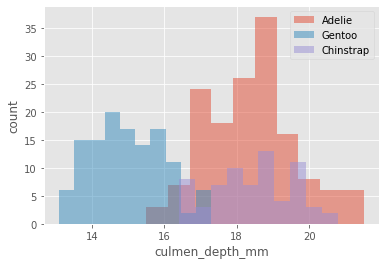

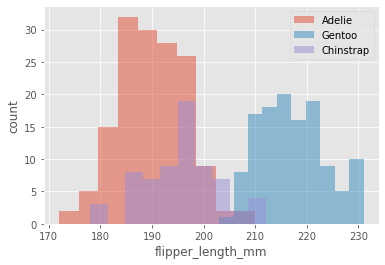

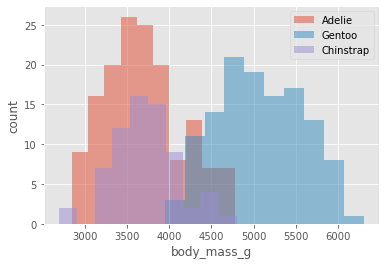

In [6]:
for i in range(X.shape[1]):  

    plt.hist(penguins[penguins["species"] == "Adelie"][X.columns[i]], label='Adelie', alpha = .5)
    plt.hist(penguins[penguins["species"] == "Gentoo"][X.columns[i]], label='Gentoo',alpha = .5)
    plt.hist(penguins[penguins["species"] == "Chinstrap"][X.columns[i]], label='Chinstrap',alpha = .5)
    
    
    plt.xlabel(X.columns[i])
    plt.ylabel("count")
    plt.legend()
    plt.show()

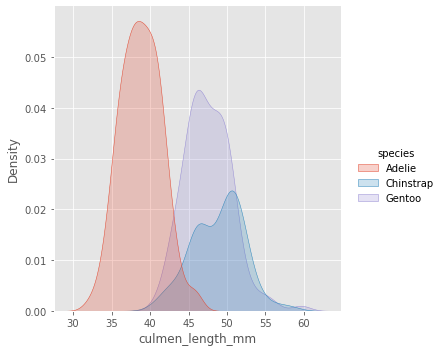

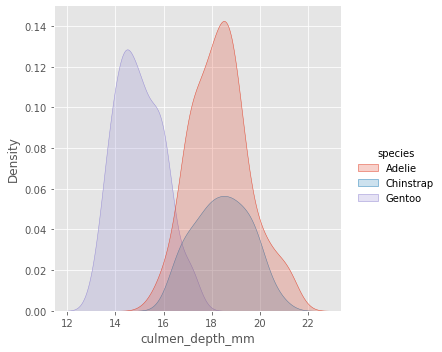

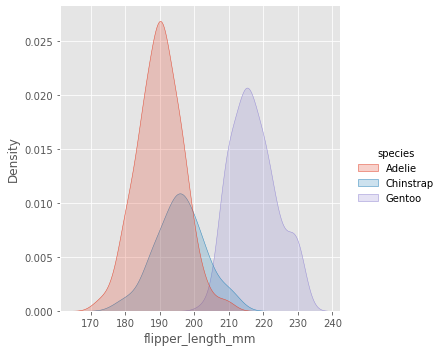

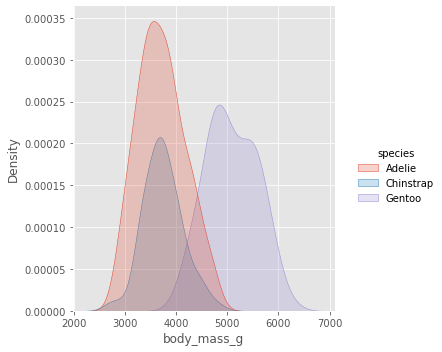

In [7]:
for i in range(X.shape[1]):   
    sns.displot(penguins, x=X.columns[i], hue="species", kind="kde", fill=True)

<p></p>
<br />
<div id="p1" style="direction:rtl;line-height:150%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
           5.2. تبدیل بردار y  به onehot و تقسیم داده ها به تست وترین
        </font>
		<p></p>
		<hr>
  	</font>
</div> 

In [8]:
import numpy as np
from itertools import chain

def _indexing(x, indices):
    if hasattr(x, 'shape'):
        return x[indices]

    return [x[idx] for idx in indices]

def split_train_test(*arrays, test_size=0.35, shufffle=True, random_seed=1):

    assert 0 < test_size < 1
    assert len(arrays) > 0
    length = len(arrays[0])
    for i in arrays:
        assert len(i) == length

    n_test = int(np.ceil(length*test_size))
    n_train = length - n_test

    if shufffle:
        perm = np.random.RandomState(random_seed).permutation(length)
        test_indices = perm[:n_test]
        train_indices = perm[n_test:]
    else:
        train_indices = np.arange(n_train)
        test_indices = np.arange(n_train, length)

    return list(chain.from_iterable((_indexing(x, train_indices), _indexing(x, test_indices)) for x in arrays))

In [9]:
X = (X- X.mean())/X.std()

In [10]:
X_train, X_test, y_train, y_test = split_train_test(X.values, y.values)

In [11]:
y_onehot_train = pd.get_dummies(y_train)
y_onehot_test = pd.get_dummies(y_test)
y_onehot_test.head(100)

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
95,0,0,1
96,0,1,0
97,0,0,1
98,0,0,1


<p></p>
<br />
<div id="p1" style="direction:rtl;line-height:150%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
           5.2. توسعه Logistic regression و متدها و معیارهای ارزیابی
        </font>
		<p></p>
		<hr>
  	</font>
</div> 

Adelie


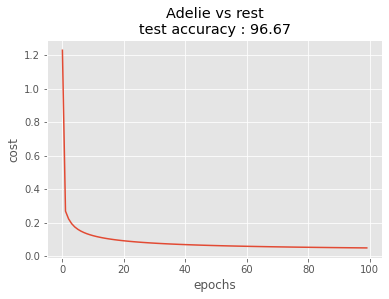

(96.667, 100.0, 92.727, 96.226)
92.73


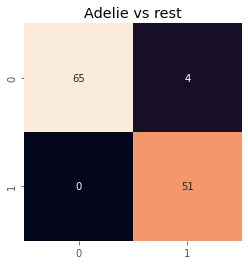

Chinstrap


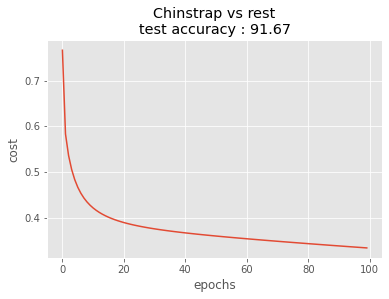

(91.667, 100.0, 68.75, 81.481)
68.75


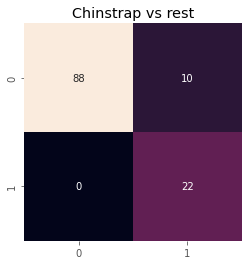

Gentoo


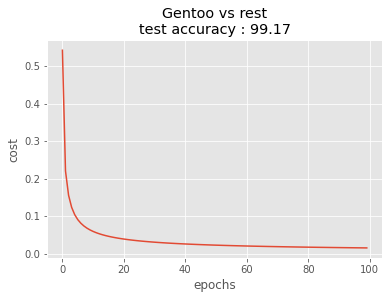

(99.167, 100.0, 97.917, 98.947)
97.92


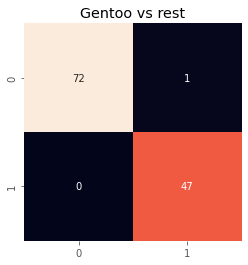

In [12]:
def calc_accuracy(y_true , y_pred):
	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)

class LogisticRegression:
    def __init__(self):
        self.losses = []

    def fit(self, X, y, epoch, lr, l2_coef):
        self.X = X
        self.y = y
        self.lr = lr
        self.w = np.ones(X.shape[1])/2
        self.b = 0
        for i in range(epoch):
            #print(self.w)
            wx_b = np.matmul(self.w, self.X.transpose()) + self.b
            pred = self._sigmoid(wx_b)
            loss = self._compute_loss(self.y, pred)
            self.losses.append(loss)
            self._update_weights(self.X, self.y, pred)

        
    def predict(self,x):
        wx_b = np.matmul( x, self.w.transpose()) + self.b
        pred = self._sigmoid(wx_b).astype(np.float32)
        pred = np.where(pred>=.5, 1, 0).astype(np.int32)
        return pred
        
    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-abs(x))
            return 1 / (1 + z)
        else:
            z = np.exp(-abs(x))
            return z / (1 + z)

    def _compute_loss(self, y_true, y_pred, eps = 1e-6):
        
        loss = y_true * np.log(y_pred + eps) + (1-y_true) * np.log(1 - y_pred +eps)
        return -np.mean(loss)


    def _update_weights(self, x, y_true, y_pred):
        err = y_pred - y_true
        dw = np.matmul(x.transpose(), err) 
        db = np.mean(err)

        self.w = self.w - self.lr*dw
        self.b = self.b - self.lr*db

def make_confusing_matrix( y_true, y_pred, class_number, labels= [0,1]):
    confusion_matrix = np.zeros((class_number, class_number))
    for i in range(class_number):
        for j in range(class_number):
            confusion_matrix[i,j] = np.sum((y_true ==labels[i])
                                             &(y_pred == labels[j]) )

    return confusion_matrix.astype(np.int32)


def calc_accuracy_precision_recall_f1(confusion_matrix):
    tp = confusion_matrix[1,1]
    fn = confusion_matrix[0,1]
    fp = confusion_matrix[1,0]
    tn = confusion_matrix[0,0]

    accuracy = round(float((tp+tn)/(tp+fp+fn+tn))*100, 3)
    precision = round(float(tp/(tp+fp))*100, 3)
    recall = round(float(tp/(tp+fn))*100,3)
    f1 = round(float(2*tp/(2*tp+fp+fn))*100,3)

    return accuracy, precision, recall, f1


def calc_jaccard(y_true,  y_pred):
    intersection = np.logical_and(y_true,y_pred )
    union = np.logical_or(y_true,y_pred )

    return round((intersection.sum() / float(union.sum()))*100, 2)

for i in range(len(y_onehot_train.columns)):    
    y_tr = y_onehot_train[y_onehot_train.columns[i]]
    y_te = y_onehot_test[y_onehot_train.columns[i]]
    lr_reg = LogisticRegression()
    lr_reg.fit(X_train, y_tr, 100, .01, 0)
    plt.plot(lr_reg.losses)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    print(y_onehot_train.columns[i])
    y_pred = lr_reg.predict(X_test)
    acc = (calc_accuracy(y_te, y_pred))
    plt.title(y_onehot_train.columns[i] + " vs rest" + "\ntest accuracy : " + str(acc))
    #plt.legend()
    conf_matrix = make_confusing_matrix( y_te, y_pred,2)
    plt.show()
    sns.heatmap(conf_matrix,  square=True, 
        annot= True ,  fmt ="d", cbar= False,
         #xticklabels=iris.target_names, yticklabels=iris.target_names
          )
    
    print(calc_accuracy_precision_recall_f1(conf_matrix))
    print(calc_jaccard(y_te, y_pred))
    plt.title(y_onehot_train.columns[i] + " vs rest" )
    #plt.legend()

    plt.show()


<p></p>
<br />
<div id="p1" style="direction:rtl;line-height:150%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
           5.3. پکیج یادگیری ماشین
        </font>
		<p></p>
		<hr>
  	</font>
</div> 

_________________Adelie__________________
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.96      1.00      0.98        51

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

jacard score Adelie vs Rest : 96.23


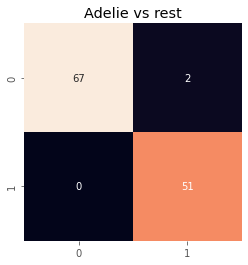

################################################################
_________________Chinstrap__________________
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        98
           1       1.00      0.86      0.93        22

    accuracy                           0.97       120
   macro avg       0.99      0.93      0.96       120
weighted avg       0.98      0.97      0.97       120

jacard score Chinstrap vs Rest : 86.36


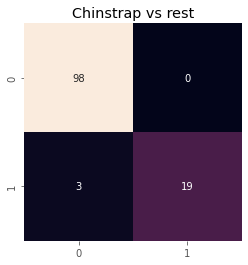

################################################################
_________________Gentoo__________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        47

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

jacard score Gentoo vs Rest : 100.0


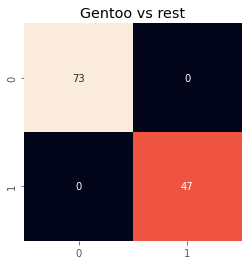

################################################################


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score 
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=.35, random_state=1)
y_onehot_train = pd.get_dummies(y_train)
y_onehot_test = pd.get_dummies(y_test)




for i in range(len(y_onehot_train.columns)):    
    y_tr = y_onehot_train[y_onehot_train.columns[i]]
    y_te = y_onehot_test[y_onehot_train.columns[i]]
    print("_________________"+y_onehot_train.columns[i]+"__________________")
    clf = LogisticRegression(random_state=0).fit(X_train, y_tr)
    y_pred = clf.predict(X_test)
    print(classification_report(y_te, y_pred, target_names= np.array(["0","1"])))
    print("jacard score "+y_onehot_train.columns[i]+ " vs Rest : "+ str(round(jaccard_score(y_te, y_pred),4)*100))

    conf_matrix = confusion_matrix( y_te, y_pred)
    sns.heatmap(conf_matrix,  square=True, 
        annot= True ,  fmt ="d", cbar= False,
         #xticklabels=iris.target_names, yticklabels=iris.target_names
          )
    plt.title(y_onehot_train.columns[i] + " vs rest" )
    plt.show()
    print("################################################################")
    # conf_matrix = make_confusing_matrix( y_te, y_pred,2)
    # plt.show()
    # sns.heatmap(conf_matrix,  square=True, 
    #     annot= True ,  fmt ="d", cbar= False,
    #      #xticklabels=iris.target_names, yticklabels=iris.target_names
    #       )

    # print(calc_accuracy_precision_recall(conf_matrix))
    # plt.title(y_onehot_train.columns[i] + " vs rest" )
    # plt.legend()
